### Import necessary packages

In [34]:
import hashlib
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import re
from tqdm.notebook import tqdm
import seaborn as sns

# 1. Extract Data from web and save into a CSV file

This code is using the `ChromeDriverManager` class from the webdriver_manager package to automatically download and install the appropriate version of the `ChromeDriver` executable, which is required to run tests using `Selenium WebDriver` and the Chrome browser. The `ChromeDriver` class from the `selenium package` is then used to create a new instance of a `Chrome WebDriver`, which can be used to control the Chrome browser and interact with web pages.

In [10]:
driver = webdriver.Chrome(ChromeDriverManager().install())

### Get pages content using `BeautifulSoup`

In [11]:
# Function to scroll down throw pages and extract source text
def scroll_down_get_all_houses(houses_list):
    # Get scroll height.
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    # The number of pages to be loaded
    print("Overall Progress:")
    for i in tqdm(range(100)):
        print("Scroll Number: " + str(i+1))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Step 1: Find all links in a page, using attr:class
        links = soup.findAll('a')
        
        # Filter just the links with a specific class
        link_class = 'post-card-item-af972 kt-col-6-bee95 kt-col-xxl-4-e9d46'
        new_links = [link for link in links if link.find_parents(class_=link_class)]
        
        # Iterating over all the links and opening them using <requests> library
        for link in tqdm(new_links):
            # Step 2: Getting the page content which corresponds to each link and make a soup
            req = requests.get("https://divar.ir" + link['href'])
            house_soup = BeautifulSoup(req.text, 'html.parser')

            items_list = []
            # Step 3: Find all tags that have relevant data to our purpose, using attr:class
            classes = ['kt-group-row-item__value', 'kt-unexpandable-row__value', "kt-page-title__subtitle kt-page-title__subtitle--responsive-sized"]
            for house_item in house_soup.findAll(True, attrs={'class': classes}):
                items_list.append(house_item.text)
            
            # We don't need these 3 items
            if len(items_list) > 0:
                del items_list[7]
                del items_list[6]
                del items_list[4]
                houses_list.append(items_list)
            
        # Scroll down in the page
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(9)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break

### Save houses data into a `DataFrame`

In [12]:
# Define the data-frame which we want to save houses data into
column_names = ['Address', 'Area', 'Year', 'Rooms', 'Price', 'Elevator', 'Parking', 'Warehouse']
houses_df = pd.DataFrame(columns=column_names)

In [13]:
# This function request to URL and then calls the scroll_down function to get all houses each as a tuple
# Finally, the bellow function saves each house in a dictionary and returns a list of dictionaries
def get_houses_from_divar():
    global houses_df
    
    houses_list = list()
    driver.get("https://divar.ir/s/tehran/buy-apartment")
    
    # Call the function which performs web-scraping
    scroll_down_get_all_houses(houses_list)
    
    # Save each houses data as a row into houses data-frame
    for index, house in enumerate(houses_list):
        if len(house) == 8:
            new_row = pd.DataFrame([house], columns=column_names)
            houses_df = pd.concat([houses_df, new_row], ignore_index=True)

In [14]:
# Calling read data from the website and insert new data into database
get_houses_from_divar()

Overall Progress:


  0%|          | 0/100 [00:00<?, ?it/s]

Scroll Number: 1


  0%|          | 0/24 [00:00<?, ?it/s]

Scroll Number: 2


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 3


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 4


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 5


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 6


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 7


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 8


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 9


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 10


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 11


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 12


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 13


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 14


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 15


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 16


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 17


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 18


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 19


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 20


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 21


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 22


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 23


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 24


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 25


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 26


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 27


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 28


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 29


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 30


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 31


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 32


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 33


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 34


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 35


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 36


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 37


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 38


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 39


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 40


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 41


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 42


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 43


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 44


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 45


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 46


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 47


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 48


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 49


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 50


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 51


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 52


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 53


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 54


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 55


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 56


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 57


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 58


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 59


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 60


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 61


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 62


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 63


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 64


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 65


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 66


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 67


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 68


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 69


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 70


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 71


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 72


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 73


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 74


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 75


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 76


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 77


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 78


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 79


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 80


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 81


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 82


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 83


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 84


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 85


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 86


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 87


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 88


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 89


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 90


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 91


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 92


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 93


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 94


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 95


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 96


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 97


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 98


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 99


  0%|          | 0/16 [00:00<?, ?it/s]

Scroll Number: 100


  0%|          | 0/16 [00:00<?, ?it/s]

In [16]:
houses_df.shape

(1051, 8)

### House data cleaning

In [17]:
# Extract the house location
houses_df['Address'] = houses_df['Address'].apply(lambda x: x.split("|")[0].split("،")[1].strip())

# Convert that have 2 values to binary value
houses_df['Elevator'] = (houses_df['Elevator'] == 'آسانسور').astype(np.int32)
houses_df['Parking'] = (houses_df['Parking'] == 'پارکینگ').astype(np.int32)
houses_df['Warehouse'] = (houses_df['Warehouse'] == 'انباری').astype(np.int32)

In [18]:
houses_df.head()

,Address,Area,Year,Rooms,Price,Elevator,Parking,Warehouse
0,جنت‌آباد شمالی,۸۸,۱۳۹۰,۲,۷۱٬۵۹۰٬۰۰۰ تومان,1,1,1
1,سبلان,۵۰,۱۳۸۲,۱,۵۶٬۰۰۰٬۰۰۰ تومان,0,1,1
2,باغ فیض,۸۱,۱۳۸۸,۲,۷۴٬۰۷۴٬۰۰۰ تومان,1,1,1
3,شمس‌آباد,۸۶,۱۳۸۵,۲,۷۲٬۶۷۴٬۰۰۰ تومان,1,1,1
4,میرداماد,۲۰۰,۱۴۰۱,۳,۱۲۰٬۰۰۰٬۰۰۰ تومان,1,1,1


In [19]:
# Extract values from persian encoding
for index, row in houses_df.iterrows():
    
    # Convert rooms to integer
    rooms_int = re.findall(r"\d+", row['Rooms'])
    houses_df.at[index, 'Rooms'] = int(rooms_int[0]) if len(rooms_int) > 0 else 0
    
    # House price to Millions Toman
    rent_int = re.findall(r"\d+", row['Price'].replace("٬", ""))
    houses_df.at[index, 'Price'] = int(rent_int[0]) if len(rent_int) > 0 else np.NAN
    houses_df.at[index, 'Price'] = houses_df.at[index, 'Price']/1000000
    
    # Area and Year to integer
    houses_df.at[index, 'Area'] = int(row['Area'])
    year_int = re.fullmatch(r"\d+", row['Year'])
    houses_df.at[index, 'Year'] = int(year_int[0]) if year_int else np.NAN   

In [20]:
# Save data-frame into a CSV file
houses_df.to_csv('houses.csv', mode='a', index=False)

In [21]:
houses_df.head()

,Address,Area,Year,Rooms,Price,Elevator,Parking,Warehouse
0,جنت‌آباد شمالی,88,1390,2,71.59,1,1,1
1,سبلان,50,1382,1,56.0,0,1,1
2,باغ فیض,81,1388,2,74.074,1,1,1
3,شمس‌آباد,86,1385,2,72.674,1,1,1
4,میرداماد,200,1401,3,120.0,1,1,1


# 2. Load CSV data

### View data

In [105]:
df = pd.read_csv('houses.csv')
df.shape

(1051, 8)

In [106]:
df.head()

,Address,Area,Year,Rooms,Price,Elevator,Parking,Warehouse
0,جنت‌آباد شمالی,88,1390.0,2,71.590,1,1,1
1,سبلان,50,1382.0,1,56.000,0,1,1
2,باغ فیض,81,1388.0,2,74.074,1,1,1
3,شمس‌آباد,86,1385.0,2,72.674,1,1,1
4,میرداماد,200,1401.0,3,120.000,1,1,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    1051 non-null   object 
 1   Area       1051 non-null   int64  
 2   Year       1046 non-null   float64
 3   Rooms      1051 non-null   int64  
 4   Price      1051 non-null   float64
 5   Elevator   1051 non-null   int64  
 6   Parking    1051 non-null   int64  
 7   Warehouse  1051 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 65.8+ KB


In [108]:
df.isna().sum()

Address      0
Area         0
Year         5
Rooms        0
Price        0
Elevator     0
Parking      0
Warehouse    0
dtype: int64

In [109]:
df = df.dropna()

### Data Cleaning

Text(0.5, 1.0, 'Area of the houses')

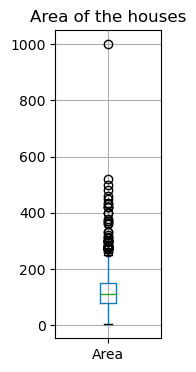

In [110]:
# View Area Outliers
plt.figure(figsize=(3,4))
plt.subplot(1, 2, 1)
fig = df.boxplot(column=['Area'])
fig.set_title('Area of the houses')

In [111]:
# Remove Area outliers
q_975 = df['Area'].quantile(0.975)
q_025 = df['Area'].quantile(0.025)
df = df[(df['Area'] <= q_975) & (df['Area'] >= q_025)]
df.shape

(998, 8)

Text(0.5, 1.0, 'Price of the houses')

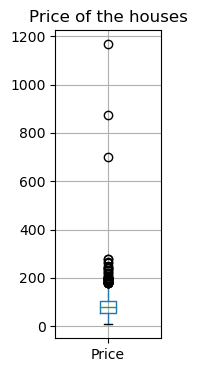

In [112]:
# View Price Outliers
plt.figure(figsize=(3,4))
plt.subplot(1, 2, 1)
fig = df.boxplot(column=['Price'])
fig.set_title('Price of the houses')

In [113]:
# Remove Area outliers
q_975 = df['Price'].quantile(0.975)
q_025 = df['Price'].quantile(0.025)
df = df[(df['Price'] <= q_975) & (df['Price'] >= q_025)]
df.shape

(948, 8)

Text(0, 0.5, 'Price(million IRLs)')

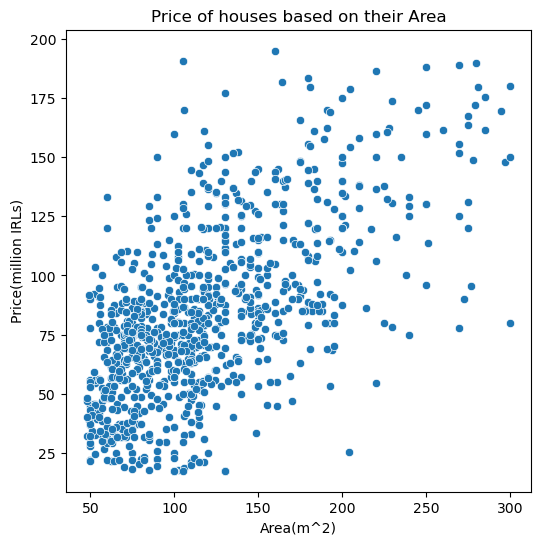

In [114]:
# Area vs Price(rls)
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Area', y='Price')
plt.title('Price of houses based on their Area')
plt.xlabel('Area(m^2)')
plt.ylabel('Price(million IRLs)')

### Add polynomial feature

In [115]:
df['Area Squared'] = df['Area'].map(lambda x: np.power(x, 2))

### Address
It's not possible to use all adresses as a separate class in our model so we can instead, get the estimated price of area in that location to benefit from the effect of house's location.

In [116]:
# I will use (mean_price/mean_area) instead of Address for benefit from its effect in my model.
area_mean = df.groupby('Address')['Area'].mean()
price_mean = df.groupby('Address')['Price'].mean()
mean_price_over_area = price_mean / area_mean
df['mean_price_over_area'] = df['Address'].apply(lambda x: mean_price_over_area[x])

In [117]:
df = df.drop(columns=['Address'])

In [118]:
df.head()

,Area,Year,Rooms,Price,Elevator,Parking,Warehouse,Area Squared,mean_price_over_area
0,88,1390.0,2,71.590,1,1,1,7744,0.852617
1,50,1382.0,1,56.000,0,1,1,2500,1.120000
2,81,1388.0,2,74.074,1,1,1,6561,0.804169
3,86,1385.0,2,72.674,1,1,1,7396,0.752685
4,200,1401.0,3,120.000,1,1,1,40000,0.717047


Text(0, 0.5, 'Count')

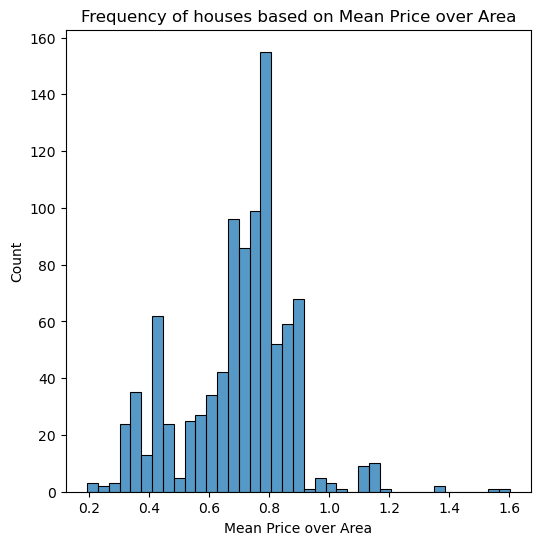

In [119]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='mean_price_over_area')
plt.title('Frequency of houses based on Mean Price over Area')
plt.xlabel('Mean Price over Area')
plt.ylabel('Count')

### Rooms

Text(0, 0.5, 'Count')

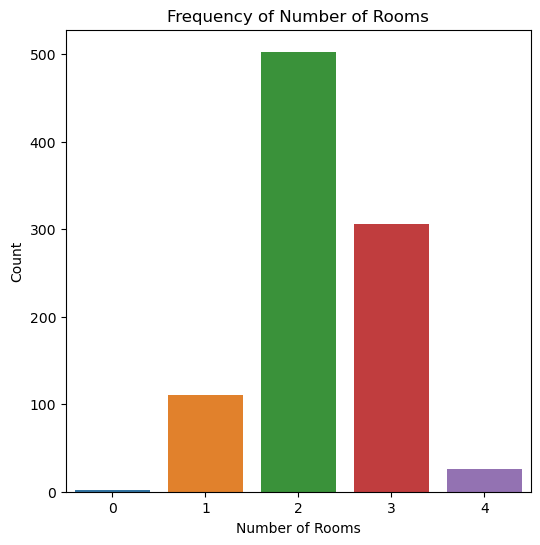

In [120]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Rooms')
plt.title('Frequency of Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

### Year
**We categorize houses based on the year of construction**

In [121]:
def year_category(year):
    if year >= 1400:
        return 1
    elif year >= 1395 and year < 1400:
        return 2
    elif year >= 1390 and year < 1395:
        return 3
    elif year >= 1385 and year < 1390:
        return 4
    else: 
        return 5
    
df['Year'] = df['Year'].apply(year_category)

Text(0, 0.5, 'Count')

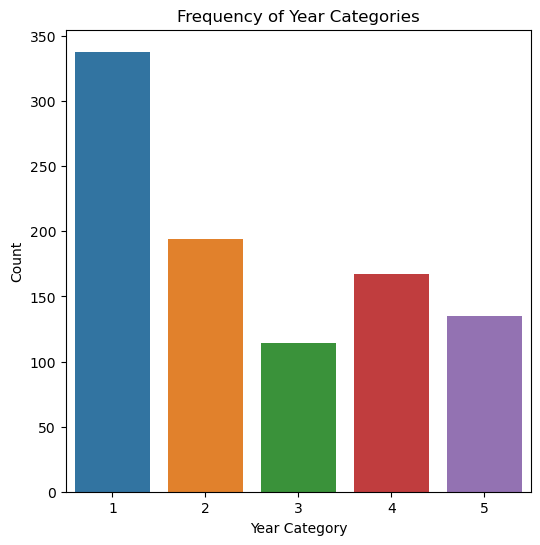

In [122]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Year')
plt.title('Frequency of Year Categories')
plt.xlabel('Year Category')
plt.ylabel('Count')

In [123]:
df.head()

,Area,Year,Rooms,Price,Elevator,Parking,Warehouse,Area Squared,mean_price_over_area
0,88,3,2,71.590,1,1,1,7744,0.852617
1,50,5,1,56.000,0,1,1,2500,1.120000
2,81,4,2,74.074,1,1,1,6561,0.804169
3,86,4,2,72.674,1,1,1,7396,0.752685
4,200,1,3,120.000,1,1,1,40000,0.717047


# 3. Create the Linear Regression Model

### Set X and y

In [149]:
X = df[['Area', 'mean_price_over_area', 'Rooms', 'Parking', 'Elevator', 'Warehouse', 'Area Squared', 'Year']]
y = df['Price']

### Normalize features | Split data

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y)

scale = StandardScaler()
scale.fit(X)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [151]:
X_train.shape, X_test.shape

((711, 8), (237, 8))

### Create model and fit data

In [152]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluate model

In [154]:
from sklearn.metrics import r2_score

score = clf.score(X_test, y_test)
r2_score = r2_score(y_test, y_pred)
print("Model Score: {0:0.4f}".format(score))

Model Score: 0.6711


### Compare predicted vs actual test data on chart

Text(0, 0.5, 'price')

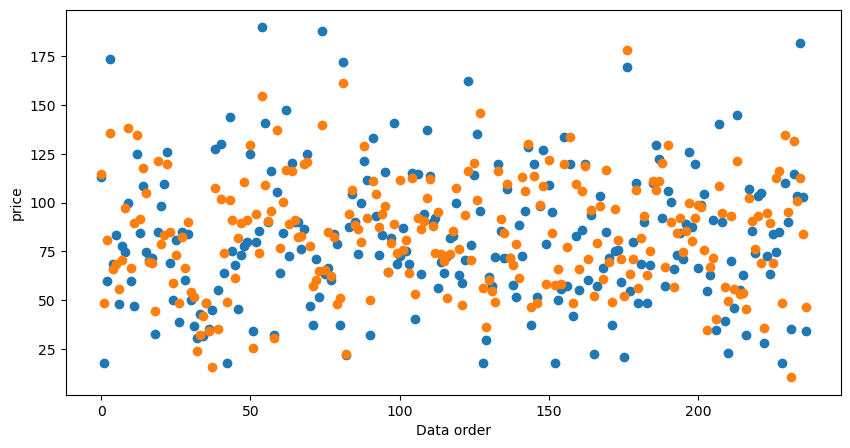

In [155]:
N = np.array(range(len(X_test)))
plt.figure(figsize=(10,5))
plt.scatter(N, y_test)
plt.scatter(N, y_pred)
plt.xlabel("Data order")
plt.ylabel("price")